In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from pydataset import data

In [2]:
import acquire
import prepare

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Exercises

#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [16]:
df = acquire.get_titanic_data()

Found CSV


In [17]:
df = prepare.prep_titanic(df)

In [18]:
train, validate, test = prepare.split_function(df, 'survived')

In [19]:
print(train.shape)
print(validate.shape)
print(test.shape)

(534, 12)
(178, 12)
(179, 12)


In [8]:
df = acquire.get_iris_data()

Found CSV


In [9]:
df = prepare.prep_iris(df)

In [10]:
train, validate, test = prepare.split_function(df, 'species')

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.


In [27]:
knn.score(X_train, y_train)

0.8146067415730337

In [28]:
confusion_matrix(y_train, y_pred)

array([[280,  49],
       [ 50, 155]])

In [29]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.76      0.76      0.76       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534




#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [23]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)

In [24]:
confusion_matrix(y_train, y_pred)

array([[280,  49],
       [ 50, 155]])

In [26]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
accuracy = (tp+tn) / (tp+tn+fp+fn)

true_positive_rate = (tp)/(tp+fn)
false_positive_rate = (fp)/ (fp+tn)
true_negative_rate = (tn)/(fp+tn)
false_negative_rate = (fn)/(tp+fn)

precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1_score = 2*(precision*recall)/(precision+recall)

support_pos = tp+fn
support_neg = tn+fp




#### 4. Run through steps 1-3 setting k to 10



In [ ]:
# below

#### 5. Run through steps 1-3 setting k to 20


In [ ]:
# below


#### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



#### 7. Which model performs best on our out-of-sample data from validate?

In [15]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
70,versicolor,5.9,3.2,4.8,1.8,1,0
123,virginica,6.3,2.7,4.9,1.8,0,1
87,versicolor,6.3,2.3,4.4,1.3,1,0
3,setosa,4.6,3.1,1.5,0.2,0,0
15,setosa,5.7,4.4,1.5,0.4,0,0


In [11]:
def xy_train_val(train, validate, test, target_variable, drop_cols):
    """
    input train, validate, test, after using split function()
    input target_variable as string
    drop_cols formatted as: ['col1', 'col2', 'etc'] for multiple columns
        This function will drop all 'object' columns. Identify additional 
        columns you want to drop and insert 1 column as a string or multiple
        columns in a list of strings.
    X_train, X_validate, X_test, y_train, y_validate, y_test
    """
    
    baseline_accuracy = train[target_variable].value_counts().max() / train[target_variable].value_counts().sum()
    print(f'Baseline Accuracy: {baseline_accuracy:.2%}')
    
    X_train = train.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_validate = validate.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_test = test.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    
    y_train = train[target_variable]
    y_validate = validate[target_variable]
    y_test = test[target_variable]
    
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [36]:
def KNN_accuracy(X_train, y_train, X_validate, y_validate):
    """
   
    """

    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    plot_confusion_matrix(knn, X_train, y_train)
    print(classification_report(y_train, y_pred))
    
    scores_all = []
    for x in range(1,21):
        knn = KNeighborsClassifier(n_neighbors=x, weights='uniform')
        knn.fit(X_train, y_train)
        train_acc = knn.score(X_train, y_train)
        val_acc = knn.score(X_validate, y_validate)
        scores_all.append([x, train_acc, val_acc])
    
    scores_df = pd.DataFrame(scores_all, columns=['n_neighbors', 'train_acc', 'val_acc'])
    scores_df['difference'] = scores_df.train_acc - scores_df.val_acc
    
    plt.figure(figsize=(14,6))
    plt.plot(scores_df.n_neighbors, scores_df.train_acc, label='train', marker='o')
    plt.plot(scores_df.n_neighbors, scores_df.val_acc, label='validate', marker='o')
    plt.xlabel('n_neighbors')
    plt.ylabel('accuracy')
    plt.xticks(np.arange(0,21,1))
    plt.title('how does the accuracy change with number of neighbors on train and validate?')
    plt.legend()
    plt.show()
    return scores_df

In [20]:
X_train, X_validate, X_test, y_train, y_validate, y_test = xy_train_val(train, validate, test, 'survived', 'passenger_id')

Baseline Accuracy: 61.61%


Baseline Accuracy: 61.61%
Confusion Matrix:
[[280  49]
 [ 50 155]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.76      0.76      0.76       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



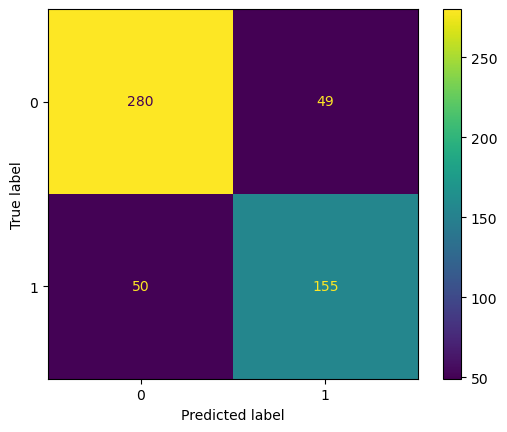

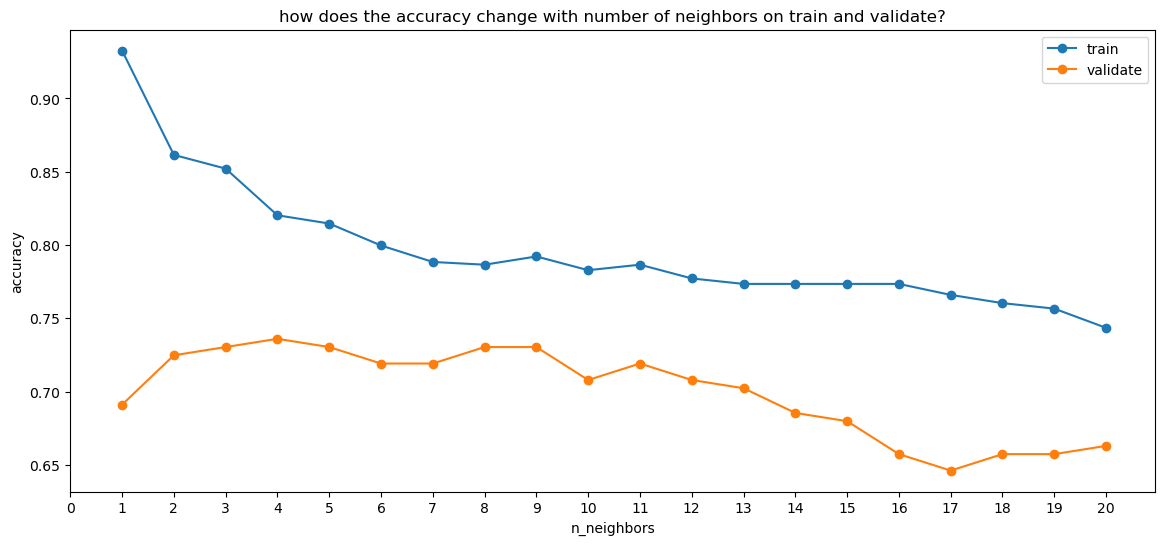

,n_neighbors,train_acc,val_acc,difference
0,1,0.932584,0.691011,0.241573
1,2,0.861423,0.724719,0.136704
2,3,0.852060,0.730337,0.121723
3,4,0.820225,0.735955,0.084270
4,5,0.814607,0.730337,0.084270
5,6,0.799625,0.719101,0.080524
6,7,0.788390,0.719101,0.069288
7,8,0.786517,0.730337,0.056180
8,9,0.792135,0.730337,0.061798
9,10,0.782772,0.707865,0.074906


In [37]:
KNN_accuracy(train, validate, test, 'survived', 'passenger_id')